# Data Analysis on Titanic Dataset

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [88]:
df = pd.read_csv("titanic.csv")

# Basic Cleaning & Feature Engineering
df.drop_duplicates(inplace=True)
df.rename(columns={
    'Siblings/Spouses Aboard': 'Family_Aboard',
    'Parents/Children Aboard': 'Parents_Children',
    'Pclass': 'Passenger_Class',
    'Fare': 'Ticket_Fare',
    'Age': 'Passenger_Age',
    'Sex': 'Gender_Text',
    'Survived': 'Survival_Status'
}, inplace=True)
df['Family_Total']=df['Family_Aboard'] + df['Parents_Children'] + 1

In [89]:
# Encode Age Groups and Fare Groups
df['AgeGroup']=pd.cut(df['Passenger_Age'], [0, 15, 25, 45, 65, 80], labels=['Child', 'Youth', 'Adult', 'Senior', 'Elder'])
df['FareGroup']=pd.cut(df['Ticket_Fare'], [0, 15, 40, 80, 600], labels=['Low', 'Medium', 'High', 'Very High'])

# Encode Gender
le = LabelEncoder()
df['Gender']=le.fit_transform(df['Gender_Text'])

## Outlier Detection

In [90]:
# Fare Outliers
Q1_fare=df['Ticket_Fare'].quantile(0.25)
Q3_fare=df['Ticket_Fare'].quantile(0.75)
IQR_fare=Q3_fare-Q1_fare
fare_outliers=df[(df['Ticket_Fare'] < Q1_fare - 1.5 * IQR_fare) | (df['Ticket_Fare'] > Q3_fare + 1.5 * IQR_fare)]

# Age Outliers
Q1_age=df['Passenger_Age'].quantile(0.25)
Q3_age=df['Passenger_Age'].quantile(0.75)
IQR_age=Q3_age - Q1_age
age_outliers=df[(df['Passenger_Age'] < Q1_age - 1.5 * IQR_age) | (df['Passenger_Age'] > Q3_age + 1.5 * IQR_age)]

print("\n Number of Age Outliers:", age_outliers.shape[0])
print(age_outliers[['Name', 'Passenger_Age']].head())

print("\n Number of Fare Outliers:", fare_outliers.shape[0])
print(fare_outliers[['Name', 'Ticket_Fare']].head())


 Number of Age Outliers: 13
                              Name  Passenger_Age
33            Mr. Edward H Wheadon           66.0
53   Mr. Engelhart Cornelius Ostby           65.0
95        Mr. George B Goldschmidt           71.0
115            Mr. Patrick Connors           70.5
278                Mr. Frank Duane           65.0

 Number of Fare Outliers: 116
                                                 Name  Ticket_Fare
1   Mrs. John Bradley (Florence Briggs Thayer) Cum...      71.2833
27                      Mr. Charles Alexander Fortune     263.0000
31      Mrs. William Augustus (Marie Eugenie) Spencer     146.5208
34                             Mr. Edgar Joseph Meyer      82.1708
51            Mrs. Henry Sleeper (Myna Haxtun) Harper      76.7292


# Data Visualization

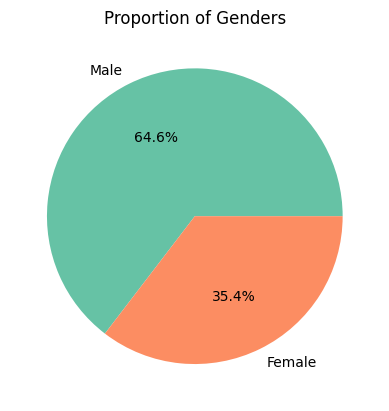

In [91]:
# Gender Proportion
plt.pie(df['Gender_Text'].value_counts(), labels=['Male', 'Female'], autopct='%1.1f%%', colors=['#66c2a5','#fc8d62'])
plt.title('Proportion of Genders')
plt.show()

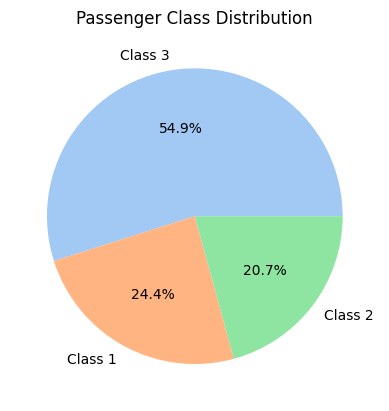

In [92]:
# Pie Chart: Passenger Class Proportion
plt.pie(df['Passenger_Class'].value_counts(), labels=['Class 3','Class 1','Class 2'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Passenger Class Distribution')
plt.show()

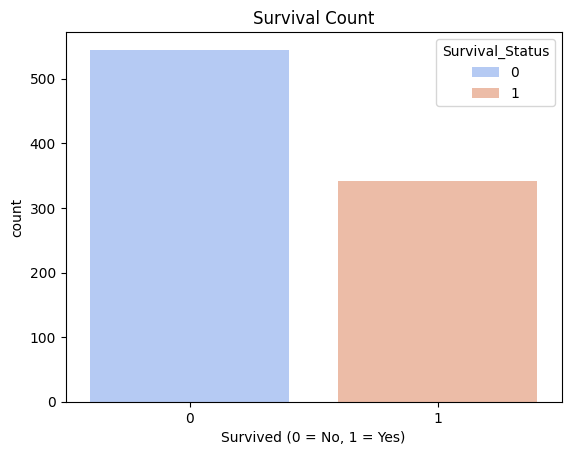

In [93]:
# Bar Chart: Survival Count
sns.countplot(x='Survival_Status',hue='Survival_Status', data=df, palette='coolwarm')
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.show()

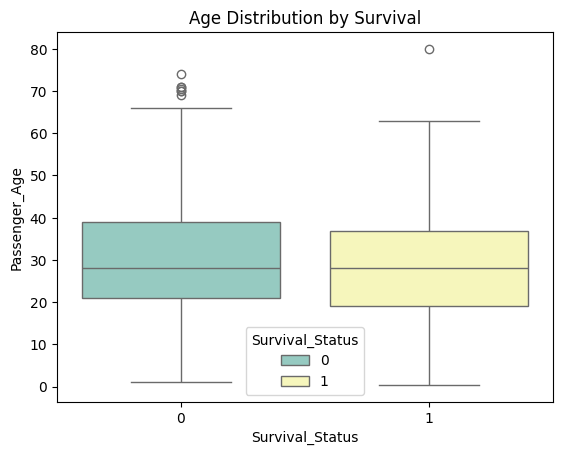

In [94]:
# Age vs Survival
sns.boxplot(x='Survival_Status', hue='Survival_Status',y='Passenger_Age', data=df, palette='Set3')
plt.title('Age Distribution by Survival')
plt.show()

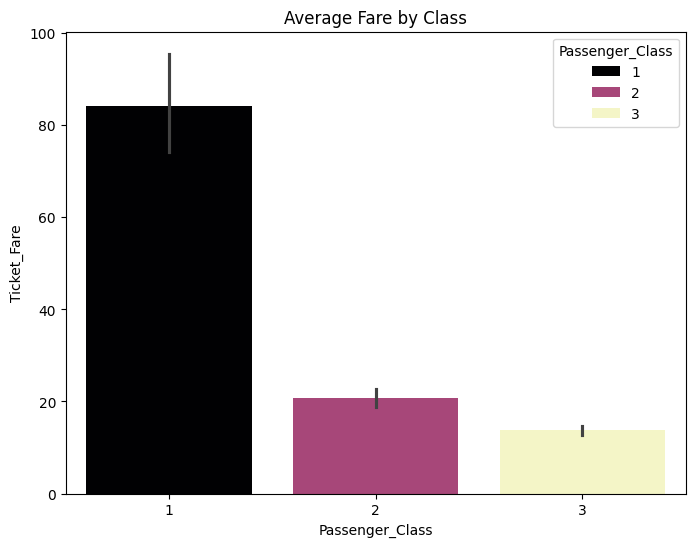

In [95]:
# Average Fare by Class
plt.figure(figsize=(8, 6))
sns.barplot(x='Passenger_Class', y='Ticket_Fare', data=df, palette='magma', hue='Passenger_Class')
plt.title('Average Fare by Class')
plt.show()

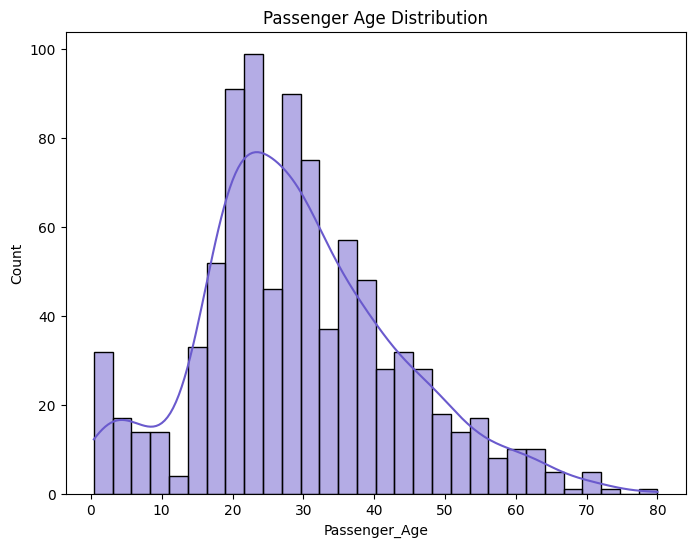

In [96]:
# Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Passenger_Age', bins=30, kde=True, color='slateblue')
plt.title('Passenger Age Distribution')
plt.show()

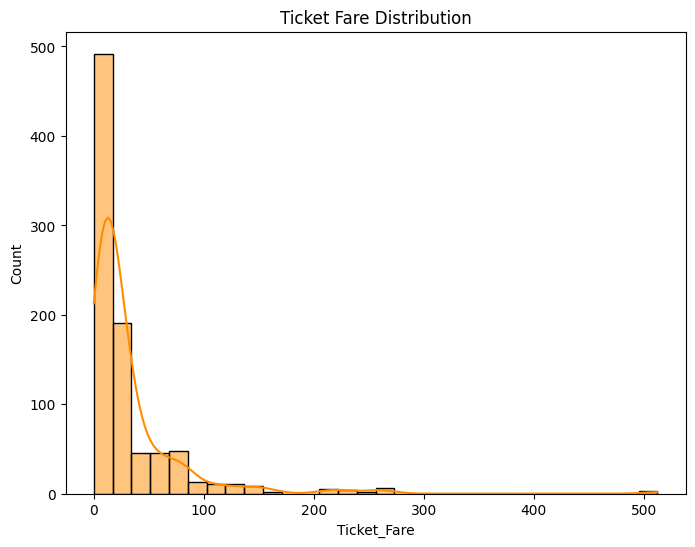

In [97]:
# Fare Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Ticket_Fare', bins=30, kde=True, color='darkorange')
plt.title('Ticket Fare Distribution')
plt.show()

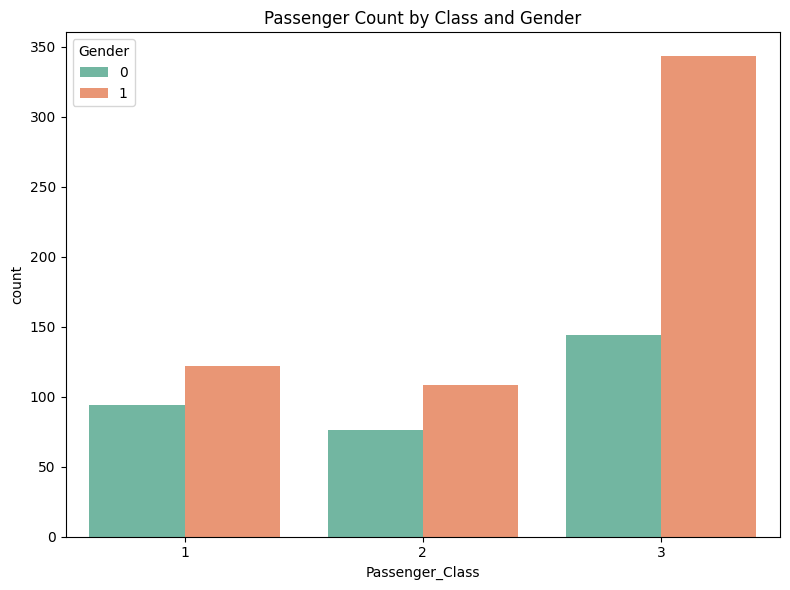

In [98]:
# Gender Count by Class
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Passenger_Class', hue='Gender', palette='Set2')
plt.title('Passenger Count by Class and Gender')
plt.tight_layout()
plt.show()

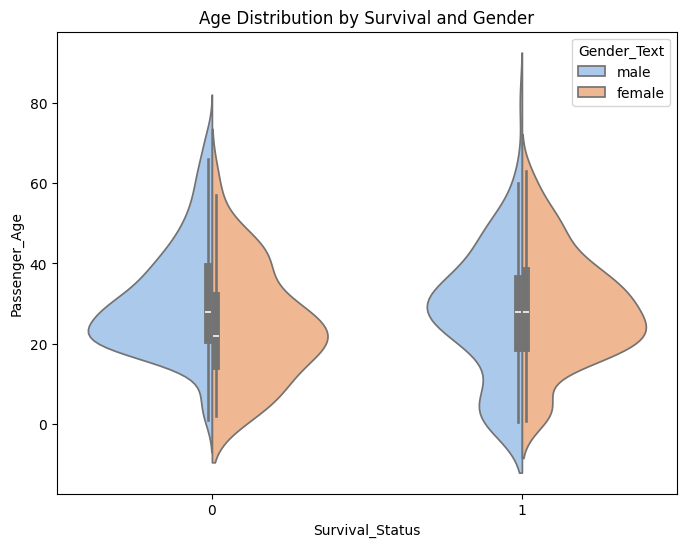

In [99]:
# Violin Plot: Age vs Survival by Gender
plt.figure(figsize=(8, 6))
sns.violinplot(x='Survival_Status', y='Passenger_Age', hue='Gender_Text', data=df, split=True, palette='pastel')
plt.title('Age Distribution by Survival and Gender')
plt.show()

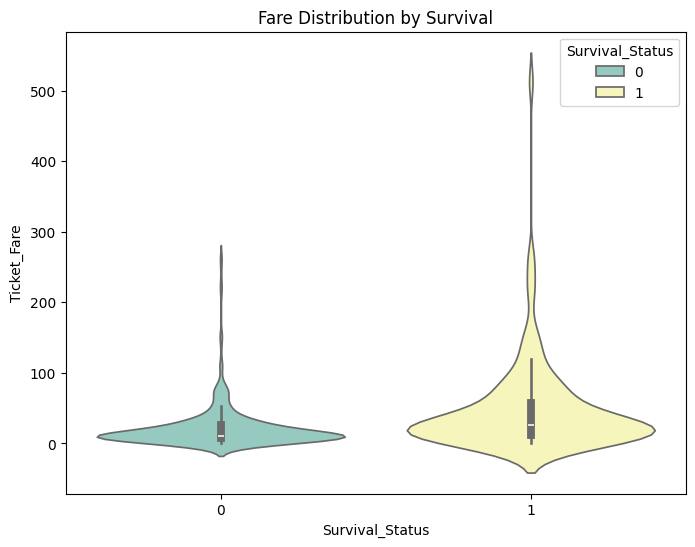

In [100]:
# Violin Plot: Fare vs Survival
plt.figure(figsize=(8, 6))
sns.violinplot(x='Survival_Status',hue='Survival_Status', y='Ticket_Fare', data=df, palette='Set3')
plt.title('Fare Distribution by Survival')
plt.show()

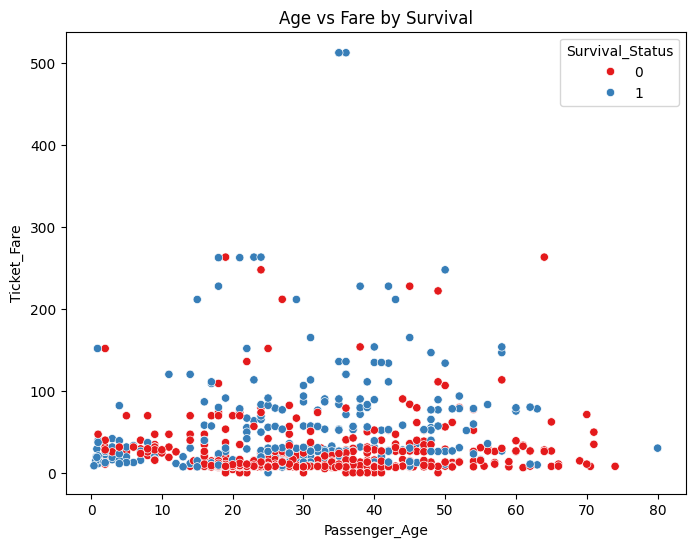

In [101]:
# Scatter Plot: Age vs Fare colored by Survival
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Passenger_Age', y='Ticket_Fare', hue='Survival_Status', palette='Set1')
plt.title('Age vs Fare by Survival')
plt.show()

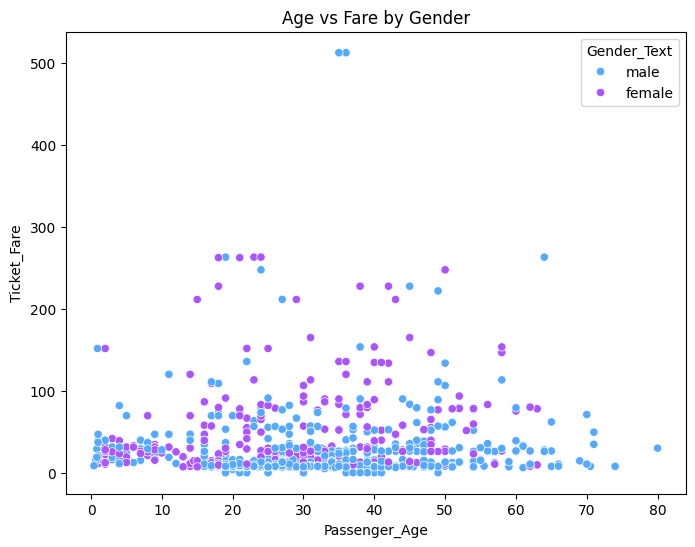

In [102]:
# Scatter Plot: Age vs Fare with Gender
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Passenger_Age', y='Ticket_Fare', hue='Gender_Text', palette='cool')
plt.title('Age vs Fare by Gender')
plt.show()

In [ ]:
# Pair Plot by Survival Status
numerical_cols = ['Passenger_Age', 'Ticket_Fare', 'Family_Aboard', 'Parents_Children']
sns.pairplot(df[numerical_cols + ['Survival_Status']], hue='Survival_Status', palette='Set2', diag_kind='kde')
plt.suptitle("Pair Plot of Titanic Features by Survival Status", y=1.02)
plt.show()

## Covariance Analysis

In [81]:
# Convert Gender to numeric for covariance calculation
df['Gender'] = df['Gender_Text'].map({'female': 0, 'male': 1})

# covariance 
cov_matrix = df[['Passenger_Class', 'Gender', 'Passenger_Age', 'Family_Aboard', 'Parents_Children', 'Ticket_Fare']].cov()
print("\n Covariance Matrix:\n", cov_matrix)


 Covariance Matrix:
                   Passenger_Class    Gender  Passenger_Age  Family_Aboard  \
Passenger_Class          0.700003  0.051845      -4.625577       0.078584   
Gender                   0.051845  0.228943       0.620805      -0.059859   
Passenger_Age           -4.625577  0.620805     199.428297      -4.643648   
Family_Aboard            0.078584 -0.059859      -4.643648       1.220293   
Parents_Children         0.013681 -0.094401      -2.209222       0.369498   
Ticket_Fare            -22.862898 -4.314629      78.968988       8.734998   

                  Parents_Children  Ticket_Fare  
Passenger_Class           0.013681   -22.862898  
Gender                   -0.094401    -4.314629  
Passenger_Age            -2.209222    78.968988  
Family_Aboard             0.369498     8.734998  
Parents_Children          0.652001     8.661314  
Ticket_Fare               8.661314  2478.251546  


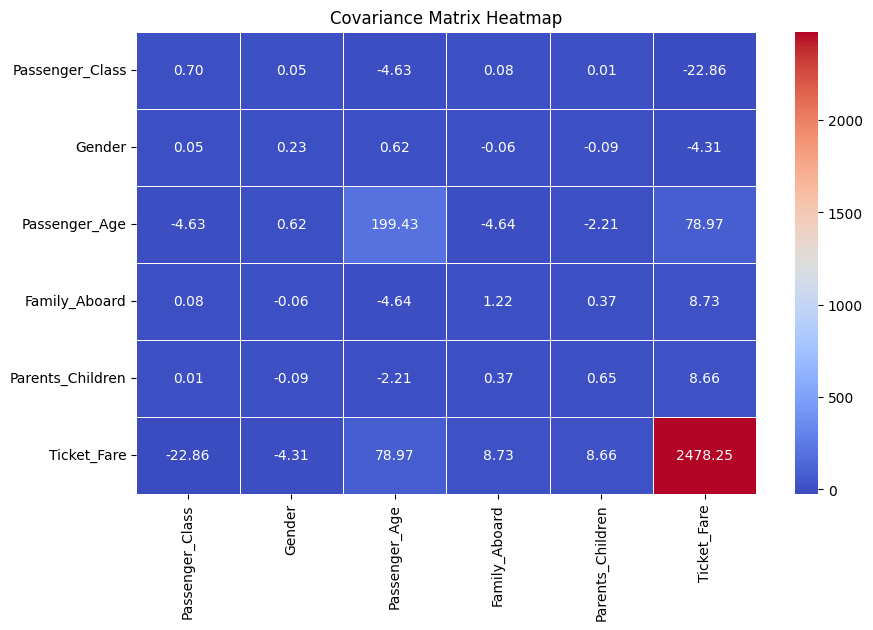

In [82]:
# Covariance Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Covariance Matrix Heatmap')
plt.show()

# Machine Learning Models

In [83]:
features = ['Passenger_Class', 'Gender', 'Passenger_Age', 'Family_Aboard', 'Parents_Children', 'Ticket_Fare']
X = df[features]
y = df['Survival_Status']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## KNN Model

In [84]:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_preds)
print(f"\n KNN Accuracy: {knn_accuracy:.2f}")
print(f" KNN Predicted Survivors: {sum(knn_preds)} out of {len(knn_preds)}")
print(classification_report(y_test, knn_preds))


 KNN Accuracy: 0.69
 KNN Predicted Survivors: 58 out of 178
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       111
           1       0.60      0.52      0.56        67

    accuracy                           0.69       178
   macro avg       0.67      0.66      0.66       178
weighted avg       0.68      0.69      0.69       178



## Decision Tree 

In [85]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_preds)
print(f"\n Decision Tree Accuracy: {dt_accuracy:.2f}")
print(f" Decision Tree Predicted Survivors: {sum(dt_preds)} out of {len(dt_preds)}")
print(classification_report(y_test, dt_preds))


 Decision Tree Accuracy: 0.74
 Decision Tree Predicted Survivors: 74 out of 178
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       111
           1       0.64      0.70      0.67        67

    accuracy                           0.74       178
   macro avg       0.72      0.73      0.72       178
weighted avg       0.74      0.74      0.74       178



## Accuracy by K Plot

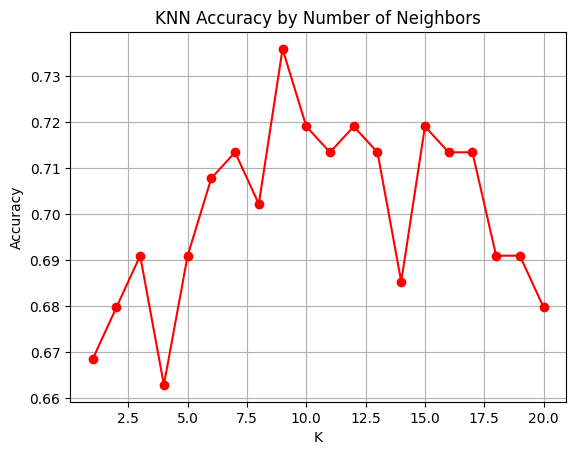

In [86]:
acc_scores = []
k_range = range(1, 21)
for k in k_range:
    knn_loop = KNeighborsClassifier(n_neighbors=k)
    knn_loop.fit(X_train, y_train)
    preds = knn_loop.predict(X_test)
    acc_scores.append(accuracy_score(y_test, preds))

best_k = k_range[acc_scores.index(max(acc_scores))]

plt.plot(k_range, acc_scores, marker='o', color='red')
plt.title('KNN Accuracy by Number of Neighbors')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()